# Basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Add the nominal set

In [3]:
jar = pd.read_csv('nominal_set.csv')

In [4]:
jar

,Unnamed: 0,Grain-size-ratio index,Grain Size (um),Operation Days,Heat Flux (W/cm2),Fission Rate (10^14 f/cm3/s),Coolant init Temp (C),Fuel Temp (C),Fission Density (10^21 f/cm3),Fuel Swelling (%),Fuel Gas Swelling (%)
0,9639,1,1.34,3,240.0,6,88,144.190800,0.15552,1.076110,0.454030
1,9640,1,1.34,4,240.0,6,88,144.234126,0.20736,1.624573,0.795133
2,9641,1,1.34,5,240.0,6,88,144.343498,0.25920,2.229238,1.192438
3,9642,1,1.34,6,240.0,6,88,144.398119,0.31104,2.864830,1.620669
4,9643,1,1.34,7,240.0,6,88,144.455641,0.36288,3.519626,2.068106
...,...,...,...,...,...,...,...,...,...,...,...
660,13423,5,34.00,131,240.0,6,88,147.617697,6.79104,44.498610,17.334450
661,13424,5,34.00,132,240.0,6,88,147.697803,6.84288,44.961899,17.590379
662,13425,5,34.00,133,240.0,6,88,147.739712,6.89472,45.660155,18.081275
663,13426,5,34.00,134,240.0,6,88,147.821740,6.94656,46.365356,18.579116


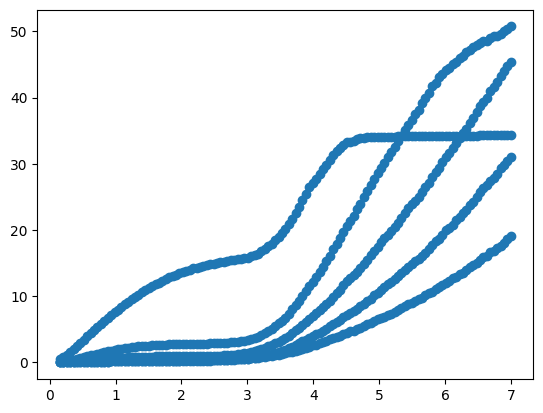

In [5]:
plt.scatter(jar['Fission Density (10^21 f/cm3)'],
                jar['Fuel Gas Swelling (%)'])

# Define Beeler's function

In [2]:
def ben(fd, D,
        a, b, c, d, e, f, g, h, j, k, l, m):
    
    def f1(fd, D):
        return a * D**b / (1+np.exp(-c * D**d * (fd - e * D**f))) / (1+np.exp(-50 * (fd-0.2)))
    def f2(fd, D):
        return (g * np.log(D) + h) / (1+np.exp(-j * D**k * (fd - l * D**m)))
    def fc(fd):
        return 1 / (1+np.exp(-2 * (fd - 1)))
    
    return (f1(fd, D) + f2(fd, D)) * fc(fd)